# Autoencoders in Keras

* [Building Autoencoders in Keras](https://blog.keras.io/building-autoencoders-in-keras.html)
* [A Tutorial on Deep Learning PDF](http://ai.stanford.edu/~quocle/tutorial2.pdf)

In [36]:
%pylab inline
from keras.layers import Input, Dense
from keras.models import Model

from keras.utils.visualize_util import plot as keras_plot
from IPython.display import SVG, Image
from keras.utils.visualize_util import model_to_dot

Populating the interactive namespace from numpy and matplotlib


### Autoencoder Model

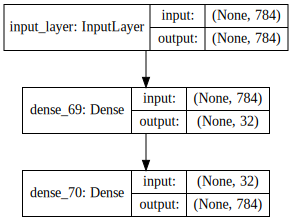

In [50]:
encoding_dim = 32  

input_img = Input(shape=(784,), name='input_layer')
encoded = Dense(output_dim=encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

# Input -> Recontruction
autoencoder = Model(input=input_img, output=decoded)

# Visualization
SVG(model_to_dot(autoencoder, show_shapes=True).create(prog='dot', format='svg'))

In [39]:
d = model_to_dot(autoencoder)


In [ ]:
model_to_dot(autoencoder).create

### Encoder Model

In [4]:
# Input Image -> Encoded 
encoder = Model(input=input_img, output=encoded)

### Decoder Model

In [14]:
encoded_input = Input(shape=(encoding_dim,))
for layer in autoencoder.layers:
    print(layer)
